# Satellite Image Data Analysis using numpy

## Data Source: Satellite Image from WIFIRE Project

WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library.


### Loading the libraries we need: numpy, scipy, matplotlib

In [ ]:
%pip install numpy scipy imageio matplotlib scikit-image
import numpy as np
from scipy import misc
import imageio
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Image URL from R2
image_url = 'https://pub-53a3b2e422384be8950ee1ea58cc8adc.r2.dev/Day2/sd-3layers.jpg'

#Good reference for matpotlib: https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1

### Creating a numpy array from an image file:


Lets choose a WIFIRE satellite image file as an ndarray and display its type.



In [ ]:
from skimage import data #a collection of algorithms for image processing and computer vision

response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

type(photo_data)

Let's see what is in this image. 

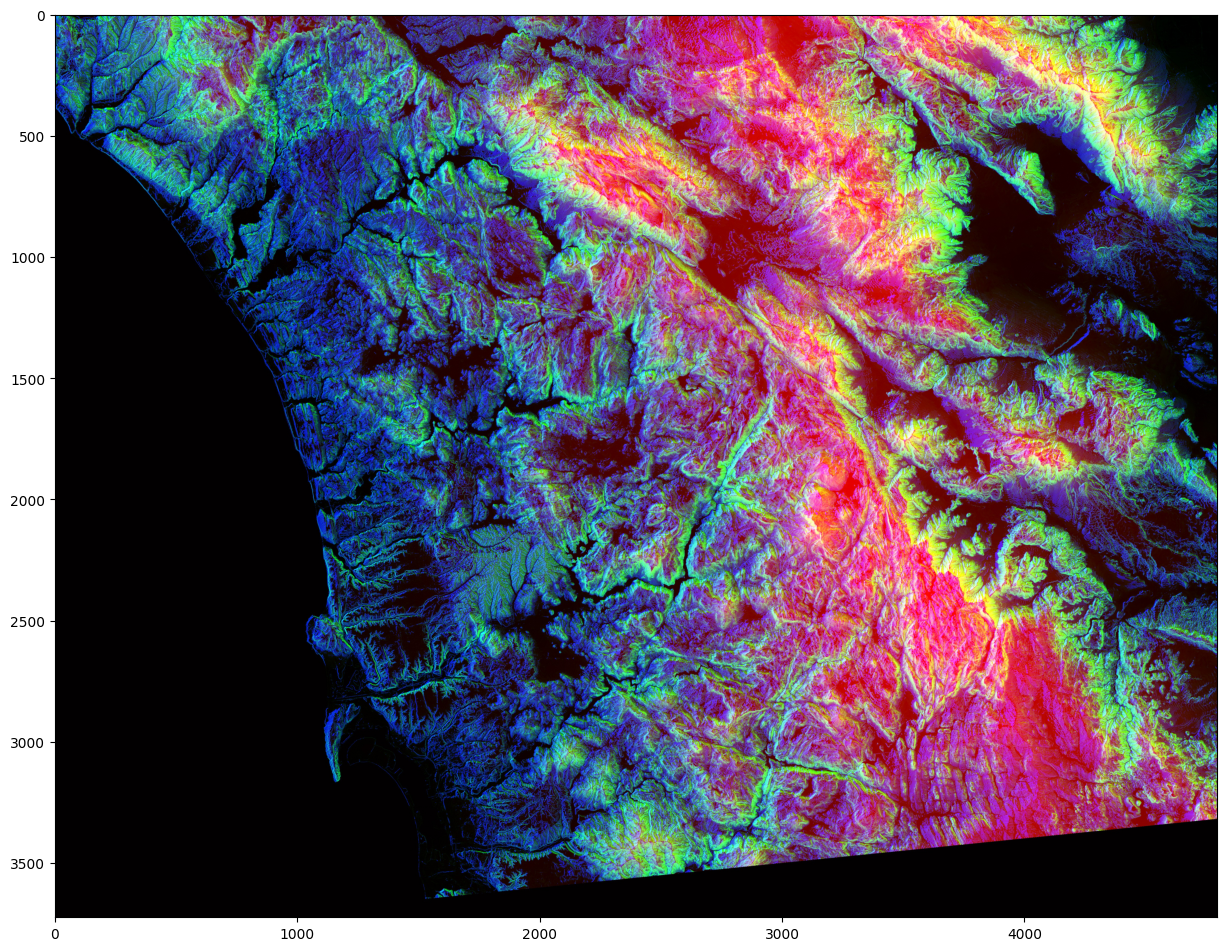

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [4]:
photo_data.shape

#print(photo_data)

(3725, 4797, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em; font-style:bold">
RGB Color Mapping in the Photo:</p>
<p style="font-family: Arial; font-size:1.25em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<p style="font-family: Arial; font-size:1.25em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<p style="font-family: Arial; font-size:1.25em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>

The higher values denote higher altitude, aspect and slope.


In [5]:
#3725 * 4797 * 3 
photo_data.size

53606475

In [6]:
photo_data.min(), photo_data.max()

(np.uint8(0), np.uint8(255))

In [7]:
photo_data.mean()

np.float64(75.77772429543259)

### Pixel on the 150th Row and 250th Column

In [8]:
photo_data[150, 250]

array([ 15,  42, 233], dtype=uint8)

In [9]:
photo_data[150, 250, 1]

np.uint8(42)

### Set a Pixel to All Zeros

We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)
photo_data[150, 250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

### Changing colors in a Range
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

photo_data[200:800, : ,1] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

photo_data[200:800, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

photo_data[200:800, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

### Pick all Pixels with Low Values

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 50
print("Shape of low_value_filter:", low_value_filter.shape)

### Filtering Out Low Values
Whenever the low_value_filter is True, set value to 0.

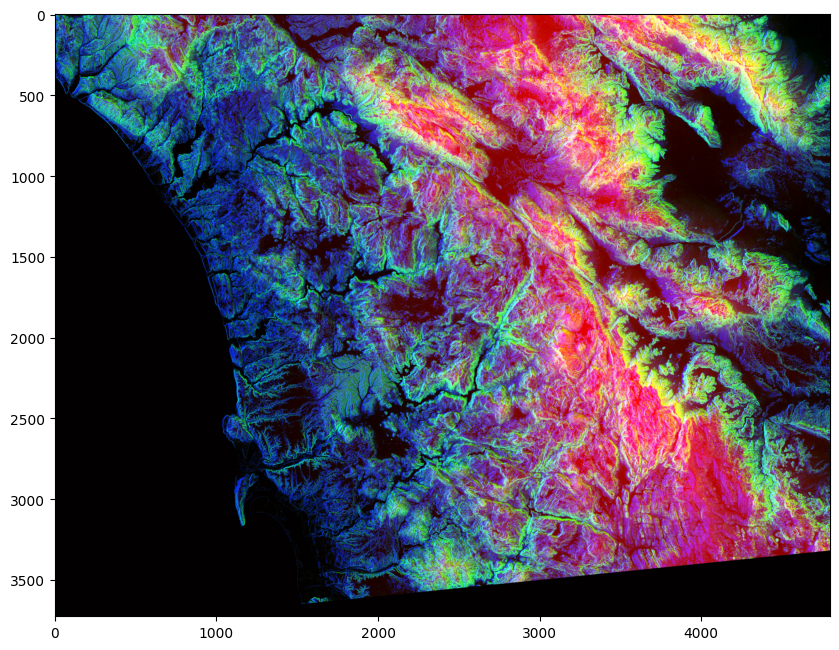

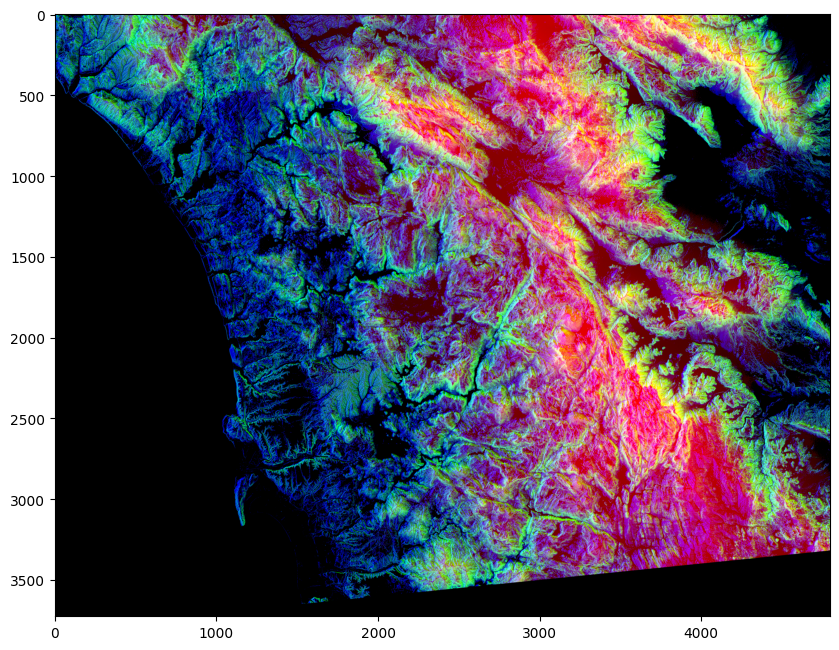

In [15]:
#import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

### More Row and Column Operations
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [16]:
print(len(photo_data))
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

3725
<class 'numpy.ndarray'>


In [17]:
photo_data[rows_range, cols_range] = 255

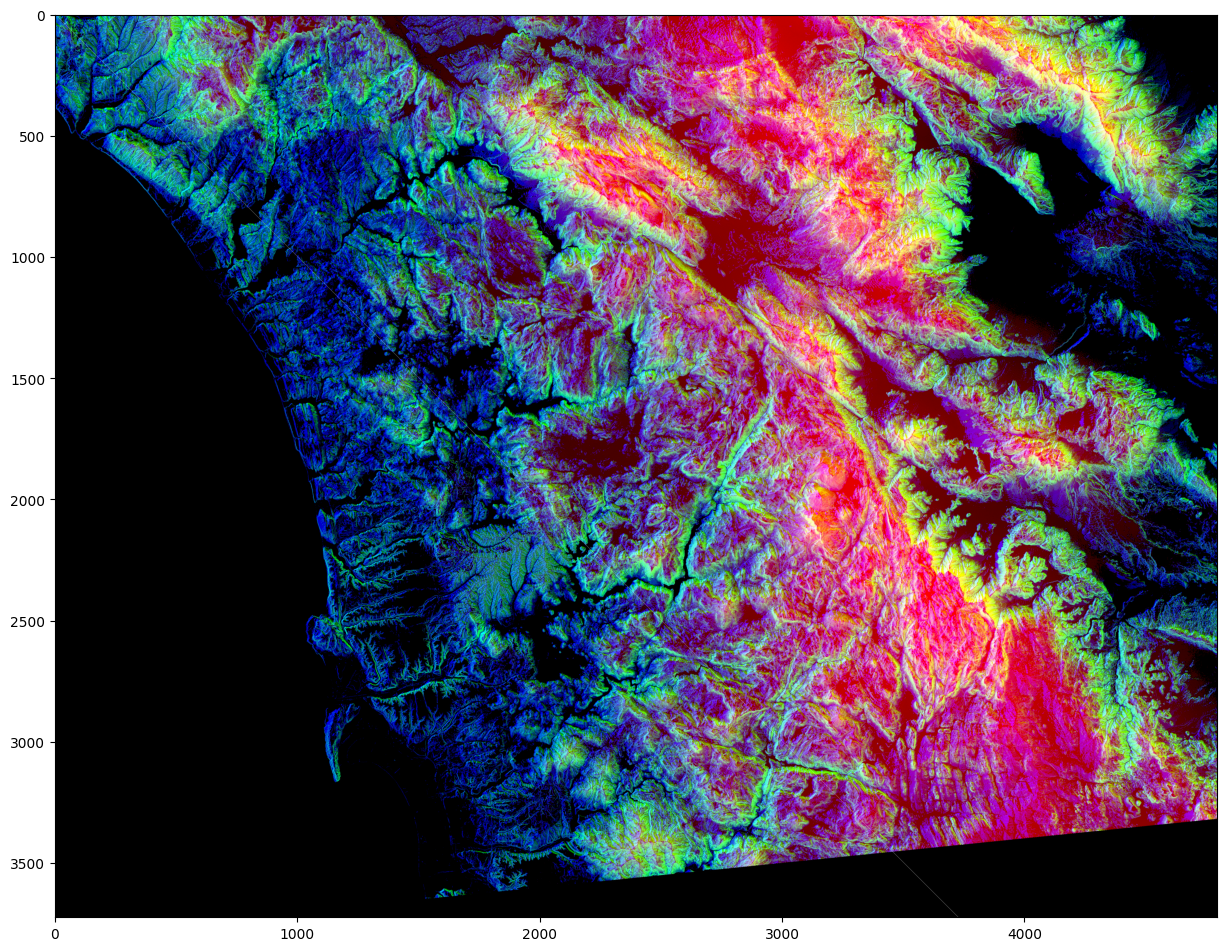

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Masking Images
Now let us try something even cooler...a mask that is in shape of a circular disc.

In [19]:
total_rows, total_cols, total_layers = photo_data.shape
#print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

X =  (3725, 1)  and Y =  (1, 4797)


In [20]:
center_row, center_col = total_rows / 2, total_cols / 2
#print("center_row = ", center_row, "AND center_col = ", center_col)
#print(X - center_row)
#print(Y - center_col)
dist_from_center = ((X - center_row)**2 + (Y - center_col)**2)**(0.5)
#print(dist_from_center)
radius = ((total_rows / 2)**2)**(0.5)
#print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
#print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)
photo_data[circular_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Further Masking
You can further improve the mask, for example just get upper half disc.

In [22]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.imread(image_data)
photo_data[half_upper_mask] = 255
#import random 
#photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Hands-on Exercise 1: Masking
Create a mask that sets the green layer in the right half of the image to highest intensity.

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

# TODO

plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Further Processing of our Satellite Imagery

### Processing RED Pixels

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)
red_mask   = photo_data[:, : ,0] < 150

photo_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Detecting Highly-GREEN Pixels

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)
green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Detecting Highly-BLUE Pixels


In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)
blue_mask  = photo_data[:, : ,2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Hands-on Exercise 2: Masking

Composite mask that takes thresholds on all three RGB layers</p>

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

# TODO

plt.figure(figsize=(15,15))
plt.imshow(photo_data)

# Solutions to Hands-on exercises:

In [29]:
%matplotlib inline
import numpy as np
from scipy import misc
import imageio
import matplotlib.pyplot as plt

### Hands-on Exercise 1: Masking
Create a mask that sets the green layer in the right half of the image to highest intensity.

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

width = photo_data.shape[1]

photo_data[:, width//2:width, 1] = 255


plt.figure(figsize=(15,15))
plt.imshow(photo_data)

### Hands-on Exercise 2: Masking
Composite mask that takes thresholds on all three RGB layers

In [ ]:
response = requests.get(image_url)
image_data = BytesIO(response.content)
photo_data = imageio.v2.imread(image_data)

red_mask   = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0

plt.figure(figsize=(15,15))
plt.imshow(photo_data)